In [1]:
# load libraries
import numpy as np
import heapq
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load saved training/validation/test data
with open('train_val_test_data.pkl', 'rb') as file:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(file)

In [ ]:
# flatten the label data
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

In [3]:
# select specific features of the input passwords
knn_features = ['length', 'uppercase_count', 'lowercase_count', 'numbers_count', 'special_character_count', 'entropy']
X_train = X_train[knn_features].to_numpy()
X_val = X_val[knn_features].to_numpy()
X_test = X_test[knn_features].to_numpy()

In [4]:
# sample from X_train to reduce number of comparisons
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [5]:
# calculate accuracy given the true labels and the predictions
def accuracy(y_truth, y_pred):
    correct_pred = 0
    # iterate through the values and check if the labels are the same, update as required
    for y_t, y_p in zip(y_truth, y_pred):
        if y_t == y_p :
            correct_pred += 1
    # find the proportion by dividing the correct predictions by all the predictions
    return correct_pred / len(y_truth)

In [6]:
# k nearest neighbors function
def knn(X, X_train_data, y_train_data, num_classes, k, norm_order):
    # initialize list of predictions
    y_pred = []
    for x in X:
        # find the distances to the training data
        distances_with_indexes = []
        # iterate through the training data and find the distances to each point using the normalization order
        for i in range(len(X_train_data)):
            # store the top k data points that are closest to x
            if len(distances_with_indexes) < k:
                heapq.heappush(distances_with_indexes, (-1 * np.linalg.norm(X_train_data[i] - x, ord=norm_order), i))
            else:
                heapq.heappushpop(distances_with_indexes, (-1 * np.linalg.norm(X_train_data[i] - x, ord=norm_order), i))
        # initialize class counts to zero
        class_counts = np.zeros(num_classes)
        # iterate through the k nearest neighbors and find the counts of each label
        for distance, index in distances_with_indexes:
            class_counts[y_train_data[index]] += 1
        # append the class with the greatest count in the neighbors as the predicted label for this x
        y_pred.append(np.argmax(class_counts))
    return y_pred

In [7]:
# # find the accuracy metrics for each set of data using knn
# train_predictions = knn(X_train, X_train_sampled, y_train_sampled, 5, 20, 2)
# train_accuracy = accuracy(y_train, train_predictions)
# print("KNN Train Accuracy:", train_accuracy)

In [ ]:
# find the accuracy metrics for each set of data using knn
val_predictions = knn(X_val, X_train_sampled, y_train_sampled, 5, 20, 2)
val_accuracy = accuracy(y_val, val_predictions)
print("KNN Validation Accuracy:", val_accuracy)

In [ ]:
# find the accuracy metrics for each set of data using knn
test_predictions = knn(X_test, X_train_sampled, y_train_sampled, 5, 20, 2)
test_accuracy = accuracy(y_test, test_predictions)
print("KNN Test Accuracy:", test_accuracy)

KNN Test Accuracy: 0.9735


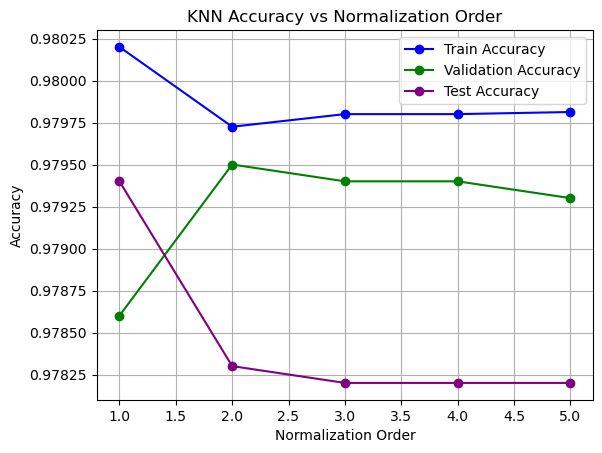

In [10]:
params = range(1, 6, 1)
train_accuracies = []
val_accuracies = []
test_accuracies = []

for param in params:
    # w = knn(X_train, y_train, 5, 5000, param)
    
    train_predictions = knn(X_train, X_train_sampled, y_train_sampled, 5, 10, norm_order=param)
    train_accuracy = accuracy(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

    val_predictions = knn(X_val, X_train_sampled, y_train_sampled, 5, 10, norm_order=param)
    val_accuracy = accuracy(y_val, val_predictions)
    val_accuracies.append(val_accuracy)

    test_predictions = knn(X_test, X_train_sampled, y_train_sampled, 5, 10, norm_order=param)
    test_accuracy = accuracy(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

plt.plot(params, train_accuracies, marker='o', color='blue', label='Train Accuracy')
plt.plot(params, val_accuracies, marker='o', color='green', label='Validation Accuracy')
plt.plot(params, test_accuracies, marker='o', color='purple', label='Test Accuracy')

plt.title('KNN Accuracy vs Normalization Order')
plt.xlabel('Normalization Order')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()